# Assignment Part

In [9]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('encoding.csv', sep=',')

In [3]:
data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [4]:
data.shape

(600000, 25)

In [5]:
data.bin_2.value_counts()

0.0    419845
1.0    162225
Name: bin_2, dtype: int64

In [6]:
data.nom_0.value_counts()

Red      323286
Blue     205861
Green     52601
Name: nom_0, dtype: int64

### To check whether Balanced (or) Unbalanced
- If there is a huge count difference 1 and 0 it is unbalanced otherwise it is balanced

In [7]:
data.target.value_counts()

0    487677
1    112323
Name: target, dtype: int64

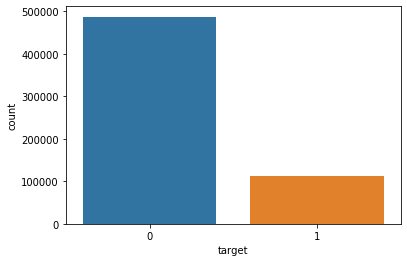

In [10]:
sns.countplot('target', data= data)

# As you can observer from the above dataset 'encoding.csv' all columns are not visibe, try to write a code using pandas to unhide all columns.

In [11]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('encoding.csv', sep=',')
data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


# What you have to do with above dataset?

## Try to figure out all categorical features, apply technique that we have learned while at the same time use any simple model & try to analyze the effect of different techniques on ML Model.

### select all the categorical columns

In [12]:
Categorical = data.select_dtypes(include=['object']).copy()
Categorical.head()

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,Contributor,Hot,c,U,Pw
1,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,Grandmaster,Warm,e,X,pE
2,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,NaN,Freezing,n,P,eN
3,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,Novice,Lava Hot,a,C,NaN
4,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,Grandmaster,Cold,h,C,OZ


In [13]:
Categorical.dtypes

bin_3    object
bin_4    object
nom_0    object
nom_1    object
nom_2    object
nom_3    object
nom_4    object
nom_5    object
nom_6    object
nom_7    object
nom_8    object
nom_9    object
ord_1    object
ord_2    object
ord_3    object
ord_4    object
ord_5    object
dtype: object

### select all the Numerical columns

In [14]:
Numerical = data.select_dtypes(exclude=['object']).copy()
Numerical.head()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
0,0,0.0,0.0,0.0,3.0,6.0,3.0,0
1,1,1.0,1.0,0.0,3.0,7.0,7.0,0
2,2,0.0,1.0,0.0,3.0,5.0,9.0,0
3,3,NaN,0.0,0.0,1.0,3.0,3.0,0
4,4,0.0,NaN,0.0,3.0,5.0,12.0,0


In [15]:
Numerical.dtypes

id          int64
bin_0     float64
bin_1     float64
bin_2     float64
ord_0     float64
day       float64
month     float64
target      int64
dtype: object

In [16]:
data.isnull().sum()

id            0
bin_0     17894
bin_1     18003
bin_2     17930
bin_3     18014
bin_4     18047
nom_0     18252
nom_1     18156
nom_2     18035
nom_3     18121
nom_4     18035
nom_5     17778
nom_6     18131
nom_7     18003
nom_8     17755
nom_9     18073
ord_0     18288
ord_1     18041
ord_2     18075
ord_3     17916
ord_4     17930
ord_5     17713
day       17952
month     17988
target        0
dtype: int64

In [17]:
data['bin_0'] = data['bin_0'].fillna(data['bin_0'].mean())   # float64
data['bin_1'] = data['bin_1'].fillna(data['bin_1'].mean())   # float64
data['bin_2'] = data['bin_2'].fillna(data['bin_2'].mean())   # float64
data['bin_3'] = data['bin_3'].fillna(data['bin_3'].mode()[0])   # object
data['bin_4'] = data['bin_4'].fillna(data['bin_4'].mode()[0])   # object
data['nom_0'] = data['nom_0'].fillna(data['nom_0'].mode()[0])   # object
data['nom_1'] = data['nom_1'].fillna(data['nom_1'].mode()[0])   # object
data['nom_2'] = data['nom_2'].fillna(data['nom_2'].mode()[0])   # object
data['nom_3'] = data['nom_3'].fillna(data['nom_3'].mode()[0])   # object
data['nom_4'] = data['nom_4'].fillna(data['nom_4'].mode()[0])   # object
data['nom_5'] = data['nom_5'].fillna(data['nom_5'].mode()[0])   # object
data['nom_6'] = data['nom_6'].fillna(data['nom_6'].mode()[0])   # object
data['nom_7'] = data['nom_7'].fillna(data['nom_7'].mode()[0])   # object
data['nom_8'] = data['nom_8'].fillna(data['nom_8'].mode()[0])   # object
data['nom_9'] = data['nom_9'].fillna(data['nom_9'].mode()[0])   # object
data['ord_0'] = data['ord_0'].fillna(data['ord_0'].mean())   # float64
data['ord_1'] = data['ord_1'].fillna(data['ord_1'].mode()[0])   # object
data['ord_2'] = data['ord_2'].fillna(data['ord_2'].mode()[0])   # object
data['ord_3'] = data['ord_3'].fillna(data['ord_3'].mode()[0])   # object
data['ord_4'] = data['ord_4'].fillna(data['ord_4'].mode()[0])   # object
data['ord_5'] = data['ord_5'].fillna(data['ord_5'].mode()[0])   # object
data['day'] = data['day'].fillna(data['day'].mean())         # float64
data['month'] = data['month'].fillna(data['month'].mean())   # float64

In [18]:
data.isnull().sum()

id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

In [19]:
Numerical = data.select_dtypes(exclude=['object']).copy()
Numerical.head()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
0,0,0.000000,0.000000,0.0,3.0,6.0,3.0,0
1,1,1.000000,1.000000,0.0,3.0,7.0,7.0,0
2,2,0.000000,1.000000,0.0,3.0,5.0,9.0,0
3,3,0.092301,0.000000,0.0,1.0,3.0,3.0,0
4,4,0.000000,0.185532,0.0,3.0,5.0,12.0,0


In [20]:
Categorical = data.select_dtypes(include=['object']).copy()
Categorical.head()

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,Contributor,Hot,c,U,Pw
1,F,Y,Red,Star,Axolotl,India,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,Grandmaster,Warm,e,X,pE
2,F,N,Red,Triangle,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,8f3276a6e,Novice,Freezing,n,P,eN
3,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,Novice,Lava Hot,a,C,Fl
4,T,N,Red,Triangle,Hamster,Costa Rica,Theremin,777d1ac2c,3a7975e46,bc9cc2a94,7d7c02c57,c5361037c,Grandmaster,Cold,h,C,OZ


In [32]:
for i in Categorical:
    print(i + '     ', Categorical[i].unique())

bin_3      [0 1]
bin_4      [0 1]
nom_0      ['Red' 'Blue' 'Green']
nom_1      ['Trapezoid' 'Star' 'Triangle' 'Circle' 'Polygon' 'Square']
nom_2      ['Hamster' 'Axolotl' 'Lion' 'Dog' 'Cat' 'Snake']
nom_3      ['Russia' 'India' 'Canada' 'Finland' 'Costa Rica' 'China']
nom_4      ['Bassoon' 'Theremin' 'Oboe' 'Piano']
nom_5      ['de4c57ee2' '2bb3c3e5c' 'b574c9841' ... 'b3ad70fcb' 'd6bb2181a'
 '30019ce8a']
nom_6      ['a64bc7ddf' '3a3a936e8' '708248125' ... '96c5df3d0' 'a93b49b8c'
 'd80c01ec8']
nom_7      ['598080a91' '1dddb8473' '5ddc9a726' '3a33ef960' 'bc9cc2a94' '8c30b9b0b'
 '1cba571fa' '81d67e1bb' '429114096' '56d35c774' '93360bbc9' '088aace2d'
 '12370b989' 'ba9faf5b1' 'fdebf0648' '90a2cba07' '5de0b3fa7' 'e5b00a0e0'
 '1d2ee04de' '4ae48e857' '69403e18c' 'cf84cbe77' 'fba315672' '6e29d3f38'
 'c3ad85934' '6b1d5295a' 'a306b1f4e' '432ee0053' '9a9e7bf71' 'b2d0012ea'
 '9d52e9089' 'bb63fcef7' 'dd4d69481' 'b0ab8b134' '2c649f60e' '42f607baa'
 '7e1c4cff1' '482233c7f' '7f31f4d2b' '11409e362' '3f6

## 1. Binary

In [25]:
Categorical['bin_3'].value_counts()

F    384226
T    215774
Name: bin_3, dtype: int64

In [26]:
Categorical['bin_3'] = Categorical['bin_3'].map({'T':1, 'F':0})

In [27]:
Categorical['bin_4'].value_counts()

N    330391
Y    269609
Name: bin_4, dtype: int64

In [28]:
Categorical['bin_4'] = Categorical['bin_4'].map({'Y':1, 'N':0})

In [29]:
Categorical.head()

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,0,0,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,Contributor,Hot,c,U,Pw
1,0,1,Red,Star,Axolotl,India,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,Grandmaster,Warm,e,X,pE
2,0,0,Red,Triangle,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,8f3276a6e,Novice,Freezing,n,P,eN
3,0,0,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,Novice,Lava Hot,a,C,Fl
4,1,0,Red,Triangle,Hamster,Costa Rica,Theremin,777d1ac2c,3a7975e46,bc9cc2a94,7d7c02c57,c5361037c,Grandmaster,Cold,h,C,OZ


## 2. Ordinal Data

In [14]:
data['nom_0'].value_counts()

Red      341538
Blue     205861
Green     52601
Name: nom_0, dtype: int64

In [15]:
data['nom_1'].value_counts()

Triangle     182346
Polygon      152563
Trapezoid    119438
Circle       104995
Square        26503
Star          14155
Name: nom_1, dtype: int64

In [16]:
data['ord_1'].value_counts()

Novice         178638
Expert         139677
Contributor    109821
Grandmaster     95866
Master          75998
Name: ord_1, dtype: int64

In [33]:
Categorical['ord_2'].value_counts()

Freezing       160801
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [34]:
Categorical['ord_2'] = Categorical['ord_2'].map({'Freezing':1, 'Cold':2, 'Warm':3, 'Hot':4, 'Boiling Hot':5, 'Lava Hot':6})

In [18]:
data['ord_3'].value_counts()

n    88898
a    65321
m    57980
c    56675
h    55744
o    45464
b    44795
e    38904
k    38718
i    34763
d    30634
f    29450
g     6180
j     3639
l     2835
Name: ord_3, dtype: int64

In [19]:
data['ord_4'].value_counts()

N    57908
P    37890
Y    36657
A    36633
R    33045
U    32897
M    32504
X    32347
C    32112
H    31189
Q    30145
T    29723
O    25610
B    25212
E    21871
K    21676
I    19805
D    17284
F    16721
W     8268
Z     5790
S     4595
G     3404
V     3107
J     1950
L     1657
Name: ord_4, dtype: int64

In [20]:
data['ord_5'].value_counts()

Fl    28275
DN     9527
Sz     8654
RV     5648
oJ     5596
      ...  
vw      189
gV      124
vQ      120
eA       91
Zv       87
Name: ord_5, Length: 190, dtype: int64

### Perform on Numerical Features

In [32]:
y = Numerical['target']   # dependent variables 
X = Numerical.drop('target', axis=1)  # independent variables

In [33]:
X.shape, y.shape  # check the shape of X and y

((600000, 7), (600000,))

In [34]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [ ]:
# check shape of train and test data

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\deepusuresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
model.score(X_train,y_train)

0.8125770833333333

In [37]:
model.score(X_test,y_test)

0.8136666666666666

### NaN's filled with mean & mode
### OneHot Encoding for all features

In [40]:
# select all the categorical columns
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,Contributor,Hot,c,U,Pw
1,F,Y,Red,Star,Axolotl,India,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,Grandmaster,Warm,e,X,pE
2,F,N,Red,Triangle,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,8f3276a6e,Novice,Freezing,n,P,eN
3,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,Novice,Lava Hot,a,C,Fl
4,T,N,Red,Triangle,Hamster,Costa Rica,Theremin,777d1ac2c,3a7975e46,bc9cc2a94,7d7c02c57,c5361037c,Grandmaster,Cold,h,C,OZ


In [ ]:
# We will use One hot encoding to convert all the categorical features
dum = pd.get_dummies(obj_df, drop_first=True)
dum.head()

# You can drop all NAN values & observe the change by applying different encoding techniques

In [41]:
new_data = data.dropna(axis=0, how='any')   # drop the null  values
new_data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,Bassoon,87a5be0d7,cdc35bd00,1cba571fa,b8e63cace,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,Bassoon,104aee31d,2a50808ba,81d67e1bb,bd9643a20,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
10,10,0.0,0.0,1.0,T,Y,Blue,Triangle,Hamster,Finland,Bassoon,8bd03e713,0d8c9ee63,93360bbc9,28869f8aa,9bfe3ee22,1.0,Novice,Hot,b,O,hG,7.0,5.0,1
11,11,0.0,0.0,1.0,F,Y,Red,Square,Hamster,Costa Rica,Oboe,b574c9841,494b565c1,088aace2d,74a092964,6c73b62e4,1.0,Contributor,Hot,b,M,xF,2.0,8.0,0


In [42]:
new_data.shape

(298042, 25)

In [43]:
# select all the categorical columns
obj_df = new_data.select_dtypes(include=['object']).copy()
obj_df.head()

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,Contributor,Hot,c,U,Pw
6,F,N,Red,Triangle,Hamster,Costa Rica,Bassoon,87a5be0d7,cdc35bd00,1cba571fa,b8e63cace,4d3766412,Grandmaster,Cold,c,R,rg
7,T,N,Red,Triangle,Axolotl,Finland,Bassoon,104aee31d,2a50808ba,81d67e1bb,bd9643a20,a651dec43,Expert,Cold,b,Y,PS
10,T,Y,Blue,Triangle,Hamster,Finland,Bassoon,8bd03e713,0d8c9ee63,93360bbc9,28869f8aa,9bfe3ee22,Novice,Hot,b,O,hG
11,F,Y,Red,Square,Hamster,Costa Rica,Oboe,b574c9841,494b565c1,088aace2d,74a092964,6c73b62e4,Contributor,Hot,b,M,xF


In [44]:
obj_df.shape

(298042, 17)

In [45]:
# We will use One hot encoding to convert all the categorical features
dum = pd.get_dummies(obj_df, drop_first=True)
dum.head()

bin_3_T  bin_4_Y  nom_0_Green  nom_0_Red  nom_1_Polygon  nom_1_Square  \
0         0        0            0          1              0             0   
6         0        0            0          1              0             0   
7         1        0            0          1              0             0   
10        1        1            0          0              0             0   
11        0        1            0          1              0             1   

    nom_1_Star  nom_1_Trapezoid  nom_1_Triangle  nom_2_Cat  nom_2_Dog  \
0            0                1               0          0          0   
6            0                0               1          0          0   
7            0                0               1          0          0   
10           0                0               1          0          0   
11           0                0               0          0          0   

    nom_2_Hamster  nom_2_Lion  nom_2_Snake  nom_3_China  nom_3_Costa Rica  \
0               1           0            0            0                 0   
6               1           0            0            0                 1   
7               0           0            0            0                 0   
10              1           0            0            0                 0   
11              1           0            0            0                 1   

    nom_3_Finland  nom_3_India  nom_3_Russia  nom_4_Oboe  nom_4_Piano  \
0               0            0             1           0            0   
6               0            0             0           0            0   
7               1            0             0           0            0   
10              1            0             0           0            0   
11              0            0             0           1            0   

    nom_4_Theremin  nom_5_0054c0c3a  nom_5_00a731d2e  nom_5_014770cf0  \
0                0                0                0                0   
6                0                0                0                0   
7                0                0                0                0   
10               0                0                0                0   
11               0                0                0                0   

    nom_5_0165aa0c3  nom_5_023ed7074  nom_5_024efa364  nom_5_0276cf712  \
0                 0                0                0                0   
6                 0                0                0                0   
7                 0                0                0                0   
10                0                0                0                0   
11                0                0                0                0   

    nom_5_0286dc1e1  nom_5_0289ab250  nom_5_028a6acde  nom_5_029d67ae5  \
0                 0                0                0                0   
6                 0                0                0                0   
7                 0                0                0                0   
10                0                0                0                0   
11                0                0                0                0   

    nom_5_0388c582c  nom_5_03c739608  nom_5_03cbd5a22  nom_5_03ea75c83  \
0                 0                0                0                0   
6                 0                0                0                0   
7                 0                0                0                0   
10                0                0                0                0   
11                0                0                0                0   

    nom_5_03f2a3450  nom_5_045558e43  nom_5_053a1f28a  nom_5_0549ab935  \
0                 0                0                0                0   
6                 0                0                0                0   
7                 0                0                0                0   
10                0                0                0                0   
11                0                0                0   

In [46]:
dum.shape

(298042, 5653)

In [47]:
# drop the categorical column from new data
new_df = new_data.drop(obj_df.columns,axis=1)
new_df

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
0,0,0.0,0.0,0.0,3.0,6.0,3.0,0
6,6,0.0,0.0,0.0,1.0,5.0,6.0,0
7,7,0.0,0.0,1.0,3.0,1.0,1.0,0
10,10,0.0,0.0,1.0,1.0,7.0,5.0,1
11,11,0.0,0.0,1.0,1.0,2.0,8.0,0
...,...,...,...,...,...,...,...,...
599990,599990,0.0,0.0,1.0,1.0,1.0,5.0,0
599991,599991,1.0,0.0,0.0,3.0,1.0,8.0,0
599992,599992,1.0,0.0,0.0,2.0,7.0,12.0,0
599993,599993,0.0,1.0,0.0,3.0,7.0,12.0,0


In [48]:
# concat dum with new_df
new_dum = pd.concat([new_df,dum],axis=1)
new_dum.head()

id  bin_0  bin_1  bin_2  ord_0  day  month  target  bin_3_T  bin_4_Y  \
0    0    0.0    0.0    0.0    3.0  6.0    3.0       0        0        0   
6    6    0.0    0.0    0.0    1.0  5.0    6.0       0        0        0   
7    7    0.0    0.0    1.0    3.0  1.0    1.0       0        1        0   
10  10    0.0    0.0    1.0    1.0  7.0    5.0       1        1        1   
11  11    0.0    0.0    1.0    1.0  2.0    8.0       0        0        1   

    nom_0_Green  nom_0_Red  nom_1_Polygon  nom_1_Square  nom_1_Star  \
0             0          1              0             0           0   
6             0          1              0             0           0   
7             0          1              0             0           0   
10            0          0              0             0           0   
11            0          1              0             1           0   

    nom_1_Trapezoid  nom_1_Triangle  nom_2_Cat  nom_2_Dog  nom_2_Hamster  \
0                 1               0          0          0              1   
6                 0               1          0          0              1   
7                 0               1          0          0              0   
10                0               1          0          0              1   
11                0               0          0          0              1   

    nom_2_Lion  nom_2_Snake  nom_3_China  nom_3_Costa Rica  nom_3_Finland  \
0            0            0            0                 0              0   
6            0            0            0                 1              0   
7            0            0            0                 0              1   
10           0            0            0                 0              1   
11           0            0            0                 1              0   

    nom_3_India  nom_3_Russia  nom_4_Oboe  nom_4_Piano  nom_4_Theremin  \
0             0             1           0            0               0   
6             0             0           0            0               0   
7             0             0           0            0               0   
10            0             0           0            0               0   
11            0             0           1            0               0   

    nom_5_0054c0c3a  nom_5_00a731d2e  nom_5_014770cf0  nom_5_0165aa0c3  \
0                 0                0                0                0   
6                 0                0                0                0   
7                 0                0                0                0   
10                0                0                0                0   
11                0                0                0                0   

    nom_5_023ed7074  nom_5_024efa364  nom_5_0276cf712  nom_5_0286dc1e1  \
0                 0                0                0                0   
6                 0                0                0                0   
7                 0                0                0                0   
10                0                0                0                0   
11                0                0                0                0   

    nom_5_0289ab250  nom_5_028a6acde  nom_5_029d67ae5  nom_5_0388c582c  \
0                 0                0                0                0   
6                 0                0                0                0   
7                 0                0                0                0   
10                0                0                0                0   
11                0                0                0                0   

    nom_5_03c739608  nom_5_03cbd5a22  nom_5_03ea75c83  nom_5_03f2a3450  \
0                 0                0                0                0   
6                 0                0                0                0   
7                 0                0                0                0   
10                0                0                0                0   
11                0                0              

In [ ]:
y = new_dum['price']   # dependent variables
X = new_dum.drop('price',axis=1)  # independent variables

In [ ]:
# split inot training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

### Linear Regression

In [49]:
# fit the regression model 
model.fit(X_train, y_train)
predict = model.predict(X_test)
model.score(X_test,y_test)

0.8183410734465217

In [50]:
model.score(X_train, y_train)

0.979066048566955

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(solver='liblinear',multi_class='ovr')
LogReg.fit(X_train, y_train)
LogReg.score(X_test, y_test)

0.0

In [53]:
LogReg.score(X_train, y_train)

0.9606299212598425